### import and load dataset

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

bike_details_df = pd.read_csv('/content/BIKE DETAILS.csv')
bike_details_df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [15]:
bike_details_df.shape

(1061, 7)

### Q1. What is the range of selling prices in the dataset?

In [16]:
min_price = bike_details_df['selling_price'].min()
max_price = bike_details_df['selling_price'].max()
min_price, max_price

(5000, 760000)

### Q2. What is the median selling price for bikes in the dataset?

In [17]:
bike_details_df['selling_price'].median()

45000.0

### Q3. What is the most common seller type?

In [18]:
bike_details_df['seller_type'].value_counts().idxmax()

'Individual'

### Q4. How many bikes have driven more than 50,000 kilometers?

In [19]:
bike_details_df[bike_details_df['km_driven'] > 50000].shape[0]

170

### Q5. What is the average km_driven value for each ownership type?

In [21]:
bike_details_df.groupby('owner')['km_driven'].mean()

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


### Q6. What proportion of bikes are from the year 2015 or older?

In [20]:
proportion_old = (bike_details_df[bike_details_df['year'] <= 2015].shape[0] / len(bike_details_df)) * 100
proportion_old

56.64467483506126

### Q7. What is the trend of missing values across the dataset?

In [ ]:
bike_details_df.isnull().sum()

### Q8. What is the highest ex_showroom_price recorded, and for which bike?

In [22]:
bike_details_df.loc[bike_details_df['ex_showroom_price'].idxmax(), ['name', 'ex_showroom_price']]

,134
name,Harley-Davidson Street Bob
ex_showroom_price,1278000.0


### Q9. What is the total number of bikes listed by each seller type?

In [23]:
bike_details_df['seller_type'].value_counts()

,count
seller_type,
Individual,1055
Dealer,6


### Q10. What is the relationship between selling_price and km_driven for first-owner bikes?

In [24]:
first_owner_bikes = bike_details_df[bike_details_df['owner'] == '1st owner']
first_owner_bikes[['km_driven', 'selling_price']].corr()

,km_driven,selling_price
km_driven,1.000000,-0.243482
selling_price,-0.243482,1.000000


### Q11. Identify and remove outliers in the km_driven column using the IQR method.

In [25]:
Q1 = bike_details_df['km_driven'].quantile(0.25)
Q3 = bike_details_df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
no_outliers_df = bike_details_df[~((bike_details_df['km_driven'] < (Q1 - 1.5 * IQR)) |
                                   (bike_details_df['km_driven'] > (Q3 + 1.5 * IQR)))]
no_outliers_df.shape

(1022, 7)

### Q12. Perform a bivariate analysis to visualize the relationship between year and selling_price.

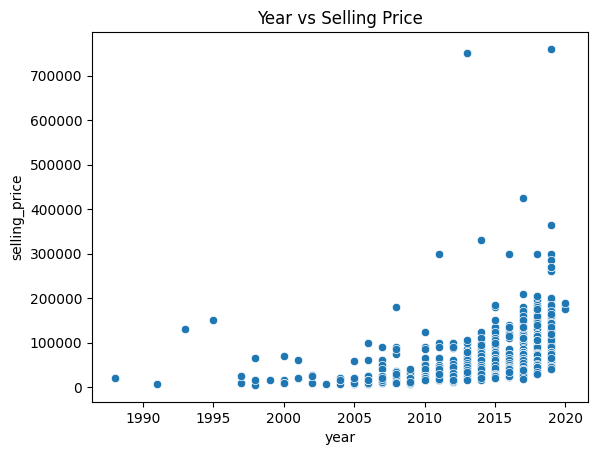

In [26]:
import seaborn as sns
sns.scatterplot(data=bike_details_df, x='year', y='selling_price')
plt.title('Year vs Selling Price')
plt.show()

### Q13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

In [27]:
import datetime
current_year = datetime.datetime.now().year
bike_details_df['bike_age'] = current_year - bike_details_df['year']
bike_details_df.groupby('bike_age')['selling_price'].mean()

,selling_price
bike_age,
5,183333.333333
6,119689.511628
7,87660.374046
8,78894.736842
9,58469.018692
10,56500.000000
11,48668.131868
12,51136.986301
13,35748.400000


### Q14. Which bike names are priced significantly above the average price for their manufacturing year?

In [29]:
avg_price_by_year = bike_details_df.groupby('year')['selling_price'].mean()
high_priced_bikes = bike_details_df[bike_details_df.apply(
    lambda row: row['selling_price'] > avg_price_by_year[row['year']], axis=1
)]
high_priced_bikes[['name', 'selling_price', 'year']]

,name,selling_price,year
0,Royal Enfield Classic 350,175000,2019
2,Royal Enfield Classic Gunmetal Grey,150000,2018
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015
7,Royal Enfield Bullet 350 [2007-2011],180000,2008
13,Yamaha YZF R3,365000,2019
...,...,...,...
1004,Bajaj Pulsar NS 200,60000,2016
1005,TVS Apache RTR 160,60000,2014
1008,Bajaj Pulsar 220 F,52000,2012
1012,Bajaj Pulsar NS 200,50000,2014


### Q15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

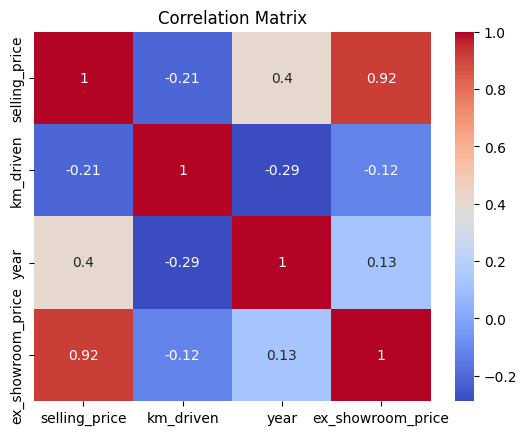

In [28]:
correlation_matrix = bike_details_df[['selling_price', 'km_driven', 'year', 'ex_showroom_price']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()